<a href="https://colab.research.google.com/github/Bennyhinn18/NM-project-AI-in-Aerospace-Engineering/blob/main/aerospace-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation
Data Acquisition and Exploration**

In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sensor-reading.csv')

# Display the first few rows of the dataset
print(data.head())

# Explore dataset information
print(data.info())


  Engine_ID           Time_Stamp  Vibration  Temperature  Fuel_Flow  \
0      E001  2024-04-28 12:00:00       0.05          300        100   
1      E001  2024-04-28 12:01:00       0.06          305        101   
2      E001  2024-04-28 12:02:00       0.07          310        102   
3      E002  2024-04-28 12:00:00       0.04          290         95   
4      E002  2024-04-28 12:01:00       0.05          295         96   

   Oil_Pressure  Altitude  Airspeed  Failure  
0            50     30000       500        0  
1            49     29950       502        0  
2            48     29900       505        0  
3            52     31000       490        1  
4            51     30950       492        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Engine_ID     48 non-null     object 
 1   Time_Stamp    48 non-null     object 
 2   Vibration   

**Data Cleaning**

In [14]:
# Handle missing values
data = data.dropna()

# Remove outliers
data = data[(data['Vibration'] < data['Vibration'].quantile(0.99)) & (data['Vibration'] > data['Vibration'].quantile(0.01))]


In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data[['Vibration', 'Temperature', 'Fuel_Flow', 'Oil_Pressure']] = scaler.fit_transform(data[['Vibration', 'Temperature', 'Fuel_Flow', 'Oil_Pressure']])


In [16]:
# Example of creating a new feature
data['Temp_Vib_Ratio'] = data['Temperature'] / data['Vibration']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Feature and target separation
X = data.drop(columns=['Failure', 'Engine_ID', 'Time_Stamp'])
y = data['Failure']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


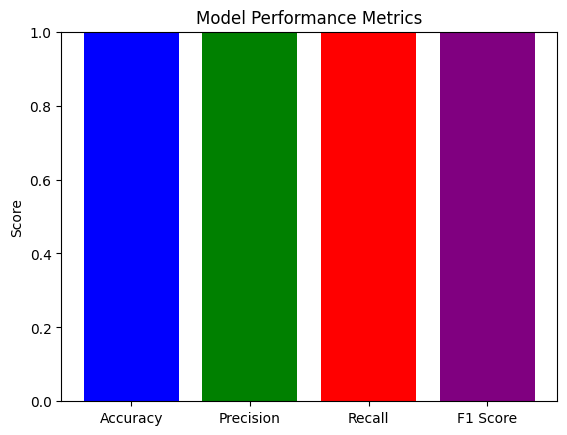

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize metrics
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [21]:
import joblib

# Save the model
model_filename = "predictive_maintenance_model.pkl"
joblib.dump(model, model_filename)

# Load the model
loaded_model = joblib.load(model_filename)

# Make a prediction
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print(f"Prediction: {'Failure' if prediction[0] else 'No Failure'}")


Prediction: Failure


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
